<a href="https://colab.research.google.com/github/AlvaroCarrizales/Proyecto_inteligencia_artificial/blob/master/For.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
import math as m
from matplotlib import pyplot as plt
from IPython.display import Image

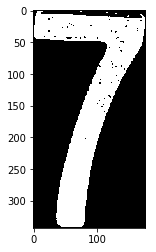

In [5]:
for punt in range(0,2):
  directorio="%d.jpg" % (punt+1)
  a=cv2.imread(directorio)
  rgB=np.matrix(a[:,:,0])
  rGb=np.matrix(a[:,:,1])
  Rgb=np.matrix(a[:,:,2])
  I=cv2.absdiff(rGb,rgB)
  II=I
  [fil,col]=I.shape 
  for o in range(0,fil):
    for oo in range(0,col):
      if I[o,oo]<80:
        I[o,oo]=0
  for o in range(0,fil):
    for oo in range(0,col):
      if I[o,oo]>0:
        I[o,oo]=1
  se=np.ones((50,50),np.uint8)
  se2=np.ones((10,10),np.uint8)
  closing=cv2.morphologyEx(I,cv2.MORPH_CLOSE,se)
  dilation=cv2.dilate(closing,se2,1)
  S,contours,hierarchy=cv2.findContours(dilation,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
  cnt=contours[:]
  num=len(cnt)
  box=np.zeros((num,4))
  for j in range(0,num):
    box[j,:]=cv2.boundingRect(cnt[j])
  L=np.zeros((num,4))
  Max=[0,0]
  for j in range(0,num):
    L[j,:]=box[j]
    if L[j,2]>Max[1]:
      Max=[j,L[j,2]]
  BOX=box[Max[0],:]
  b=a[int(BOX[1]):int(BOX[1])+int(BOX[3]),int(BOX[0]):int(BOX[0])+int(BOX[2]),:]
  directorio2="blank%d.jpg" % (punt+1)
  cv2.imwrite(directorio2,b)
  directorio3="blank%d.jpg" % (punt+1)
  A=cv2.imread(directorio3)
  [fil,col,cap]=A.shape
  rgB=A[:,:,0]
  rGb=A[:,:,1]
  Rgb=A[:,:,2]
  R=Rgb/255.0
  G=rGb/255.0
  B=rgB/255.0
  K=np.zeros((fil,col))
  for o in range(0,fil):
    for oo in range(0,col):
      MAX=max(R[o,oo],G[o,oo],B[o,oo])
      K[o,oo]=1-MAX
  cv2.imwrite("prueba%d.bmp" % (punt+1),K)
  k=cv2.imread("prueba%d.bmp" % (punt+1))
  BW1=cv2.Laplacian(k,cv2.CV_8UC1)
  Image=BW1[:,:,0]+BW1[:,:,1]+BW1[:,:,1]
  ret,thresh=cv2.threshold(Image,0,255,0)
  S,contours,hierarchy=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
  cnt=contours[:]
  num=len(cnt)
  box=np.zeros((num,4))
  for j in range(0,num):
    box[j,:]=cv2.boundingRect(cnt[j])
  Box=np.zeros((20,4))
  [L,A]=thresh.shape
  q=0
  for j in range(0,num):
    p=box[j,:]
    if p[3]>=0.4*L and p[3]<=0.7*L and p[2]>=0.08*A and p[2]<=0.17*A:
      Box[q]=p
      q=q+1
  BOX=np.zeros((6,4))
  num=len(Box)
  q=0
  for j in range(0,num):
    if j%2==0 and j<11:
      BOX[q]=Box[j]
      q=q+1
  for i in range(1,6):
    for j in range(0,6-i):
      if(BOX[j,0] > BOX[j+1,0]):
        TEMP=np.zeros((6,4))
        TEMP[j,:]=BOX[j,:]
        BOX[j,:]=BOX[j+1,:]
        BOX[j+1,:]=TEMP[j,:]
  LETRA1=k[int(BOX[0,1]):int(BOX[0,1])+int(BOX[0,3]),int(BOX[0,0]):int(BOX[0,0])+int(BOX[0,2])]
  LETRA2=k[int(BOX[1,1]):int(BOX[1,1])+int(BOX[1,3]),int(BOX[1,0]):int(BOX[1,0])+int(BOX[1,2])]
  LETRA3=k[int(BOX[2,1]):int(BOX[2,1])+int(BOX[2,3]),int(BOX[2,0]):int(BOX[2,0])+int(BOX[2,2])]
  NUM1=k[int(BOX[3,1]):int(BOX[3,1])+int(BOX[3,3]),int(BOX[3,0]):int(BOX[3,0])+int(BOX[3,2])]
  NUM2=k[int(BOX[4,1]):int(BOX[4,1])+int(BOX[4,3]),int(BOX[4,0]):int(BOX[4,0])+int(BOX[4,2])]
  NUM3=k[int(BOX[5,1]):int(BOX[5,1])+int(BOX[5,3]),int(BOX[5,0]):int(BOX[5,0])+int(BOX[5,2])]
  plt.imshow(LETRA1*255)
  plt.savefig("letra1%d.jpg" % (punt+1))
  plt.imshow(LETRA2*255)
  plt.savefig("letra2%d.jpg" % (punt+1))
  plt.imshow(LETRA3*255)
  plt.savefig("letra3%d.jpg" % (punt+1))
  plt.imshow(NUM1*255)
  plt.savefig("num1%d.jpg" % (punt+1))
  plt.imshow(NUM2*255)
  plt.savefig("num2%d.jpg" % (punt+1))
  plt.imshow(NUM3*255)
  plt.savefig("num3%d.jpg" % (punt+1))
 